
✅ Dataset Loaded Successfully
First 5 rows:
        Date   SPX  USO   SLV  EUR/USD  Gold Price
0 2023-01-01  3800   70  22.0     1.05        1825
1 2023-02-01  3900   72  23.0     1.06        1850
2 2023-03-01  3950   75  24.0     1.07        1875
3 2023-04-01  4000   78  25.0     1.08        1890
4 2023-05-01  4050   80  26.0     1.09        1910

Dataset shape: (20, 6)

Missing values:
 Date          0
SPX           0
USO           0
SLV           0
EUR/USD       0
Gold Price    0
dtype: int64

Columns in dataset:
['Date', 'SPX', 'USO', 'SLV', 'EUR/USD', 'Gold Price']

Using 'Gold Price' as target column

📊 Model Evaluation Results:
R² Score: 0.9987
Mean Absolute Error: 3.8629


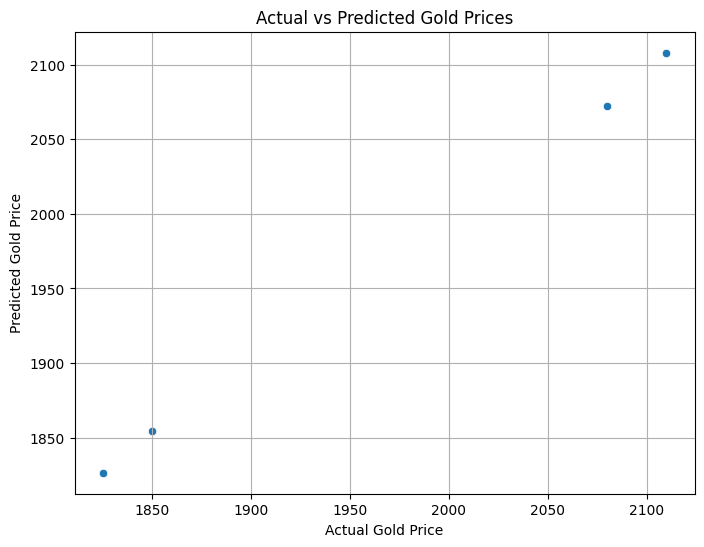

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# ------------------------
# Step 1: Load dataset
# ------------------------
file_path = "gold_price.csv"  # make sure this file is in the same folder
data = pd.read_csv(file_path)

# Convert Date column if it exists
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])

print("\n✅ Dataset Loaded Successfully")
print("First 5 rows:")
print(data.head())
print("\nDataset shape:", data.shape)
print("\nMissing values:\n", data.isnull().sum())

# ------------------------
# Step 2: Show column names
# ------------------------
print("\nColumns in dataset:")
print(list(data.columns))
# ------------------------
# Step 3: Detect target column
# ------------------------
possible_targets = ['Gold Price', 'Price', 'Close', 'Value', 'GLD']
target_column = None
for col in possible_targets:
    if col in data.columns:
        target_column = col
        break

if target_column is None:
    raise ValueError("Could not find target column. Please check dataset columns above.")

print(f"\nUsing '{target_column}' as target column")

# ------------------------
# Step 4: Features and target
# ------------------------
X = data.drop(columns=[target_column, 'Date'], errors='ignore')
y = data[target_column]

# ------------------------
# Step 5: Split data
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------
# Step 6: Train model
# ------------------------
model = LinearRegression()
model.fit(X_train, y_train)
# ------------------------
# Step 7: Predictions and Evaluation
# ------------------------
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\n📊 Model Evaluation Results:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# ------------------------
# Step 8: Visualization
# ------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price")
plt.title("Actual vs Predicted Gold Prices")
plt.grid(True)
plt.show()